In [1]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

from IPython.display import display
# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [2]:
KOFOLA="kofola-d0fc1c7"
KOFOLA_RED="kofola-red-d0fc1c7"
KOFOLA_TELA="kofola-tela-d0fc1c7"
KOFOLA_TELA_RED="kofola-tela-red-d0fc1c7"
SPOT="spot-2.14.1"
SPOT_RED="spot-red-2.14.1"

# Timeout (in seconds) 
TIMEOUT=120


TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
    KOFOLA,
    KOFOLA_RED,
    KOFOLA_TELA,
    KOFOLA_TELA_RED,
    SPOT,
    SPOT_RED,

    # you can add more tools here directly if needed
]))

BENCHES = [
  #"s1s_direct_red",
  "tela_determinisation_elevator",
]

In [4]:
df_all = load_benches(BENCHES, TOOLS, TIMEOUT) # last parameter is timeout
classification_df = parse_classifications_for_benchmarks(BENCHES)
# Join with main data
df_all = join_with_classification(df_all, classification_df)


## Evaluation

In [5]:
print(simple_table(df_all, TOOLS, BENCHES, separately=False))
print(simple_table(df_all, TOOLS, BENCHES, separately=True))

# of automata: 61
----------------------------------------------------------------------------------------------------
tool                       ✅    ❌    states    max-states    states-avg    states-med    time    time-avg    time-med    TO
-----------------------  ----  ----  --------  ------------  ------------  ------------  ------  ----------  ----------  ----
kofola-d0fc1c7             61     0  10721.00       3224.00        175.75         12.00    1.83        0.03        0.00     0
kofola-red-d0fc1c7         61     0  10678.00       3224.00        175.05         12.00    2.52        0.04        0.01     0
kofola-tela-d0fc1c7        61     0  10721.00       3224.00        175.75         12.00    1.68        0.03        0.00     0
kofola-tela-red-d0fc1c7    61     0  10678.00       3224.00        175.05         12.00    2.42        0.04        0.00     0
spot-2.14.1                60     0  38871.00      12563.00        647.85         17.50    0.33        0.01        0.00     0
s

In [8]:
TOOL_FOR_COMPARISON = KOFOLA_TELA

### States

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


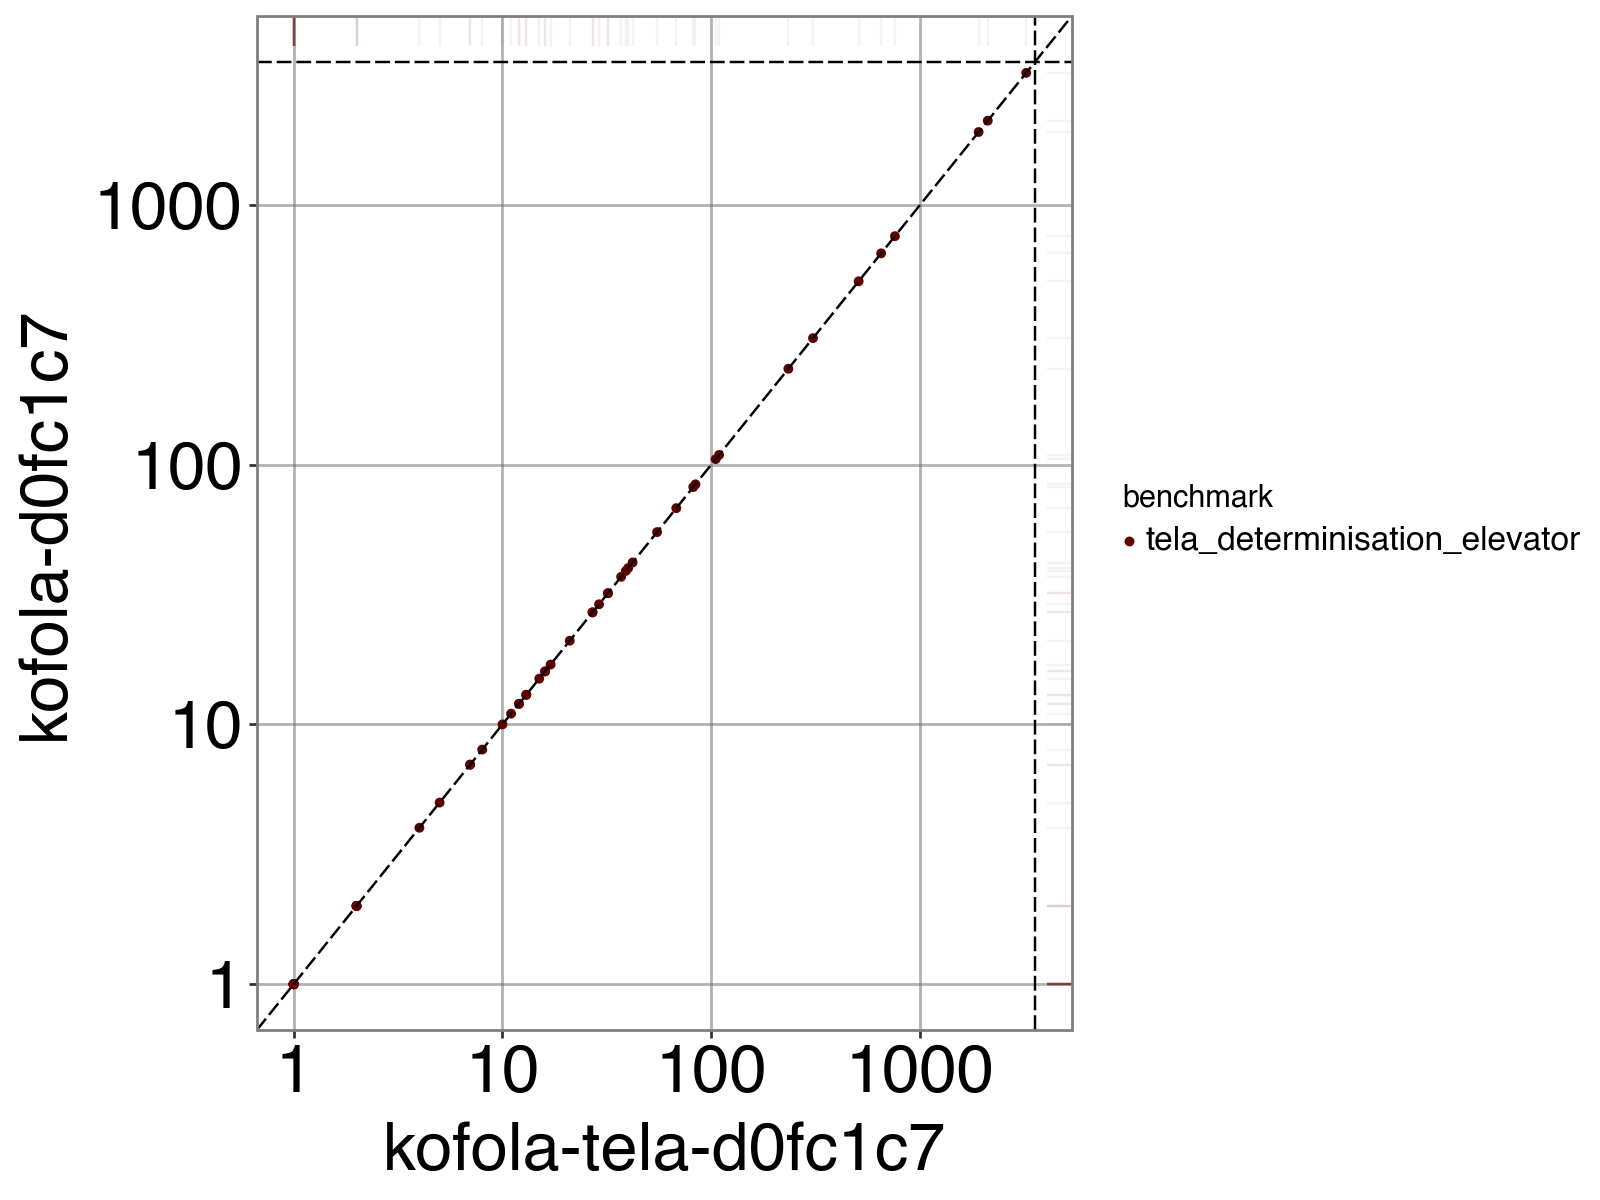

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


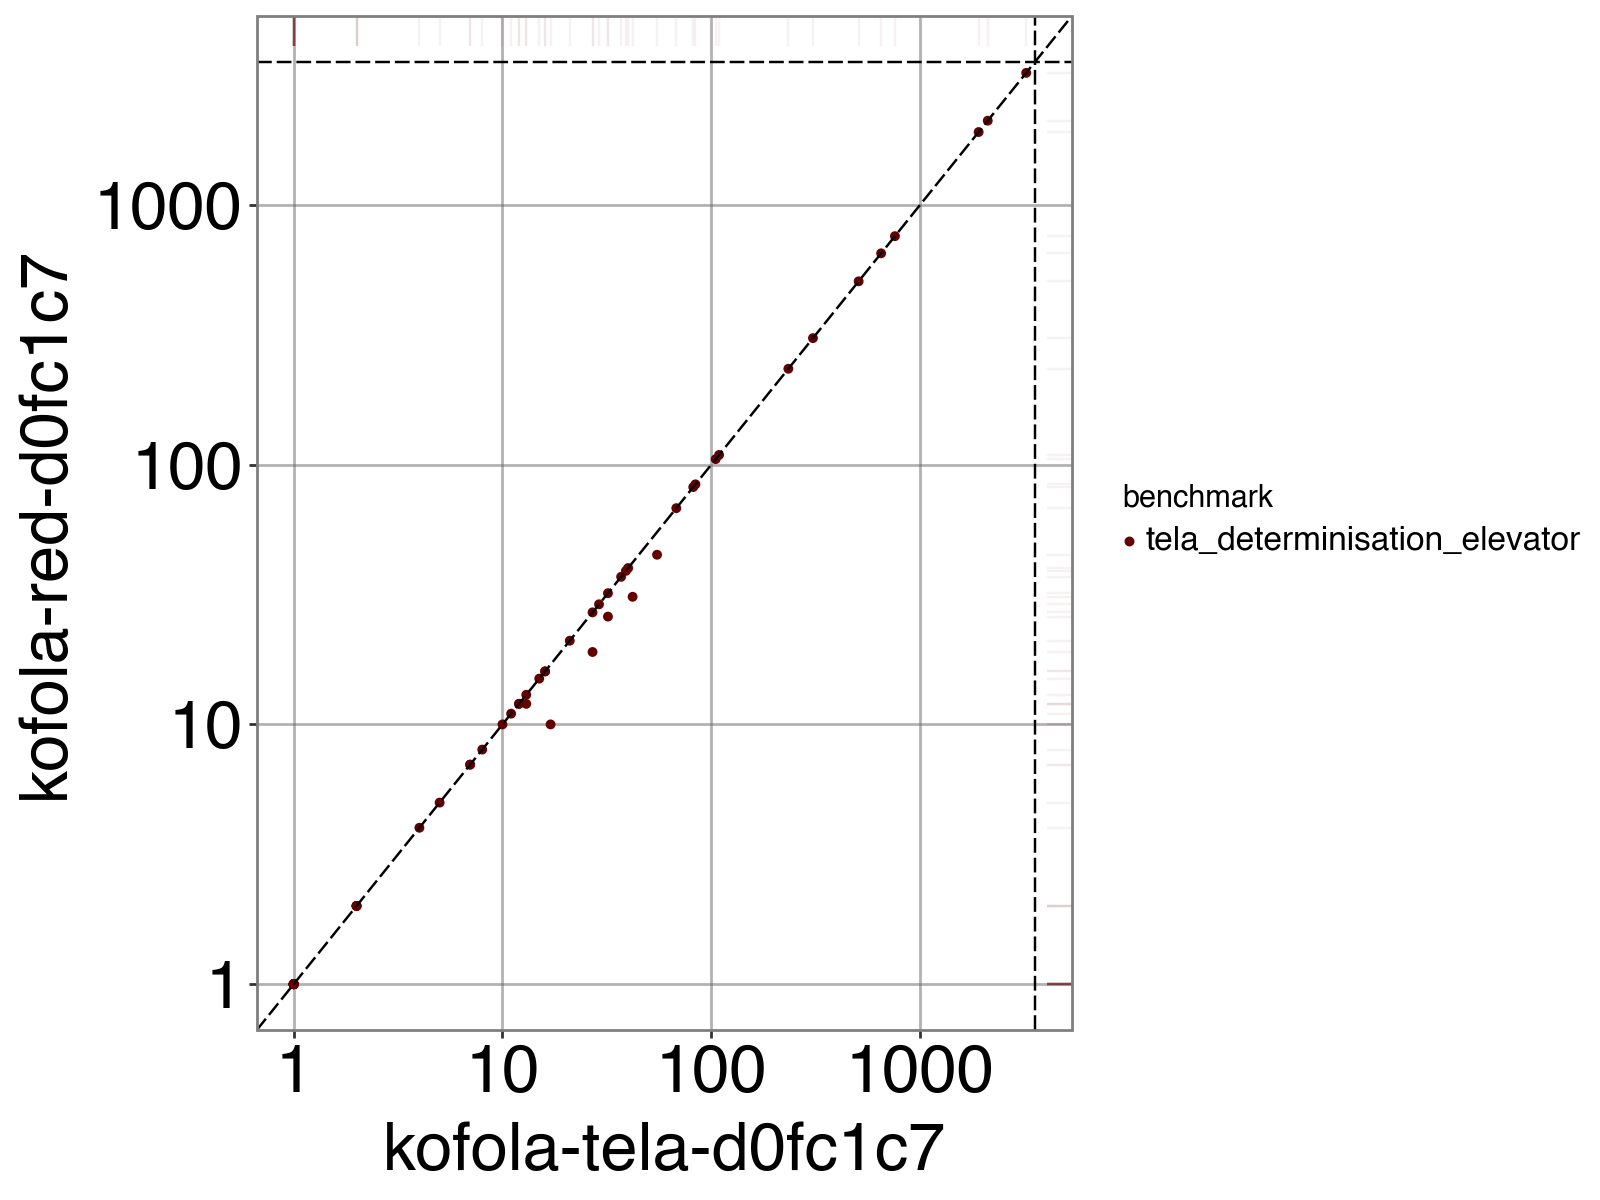

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


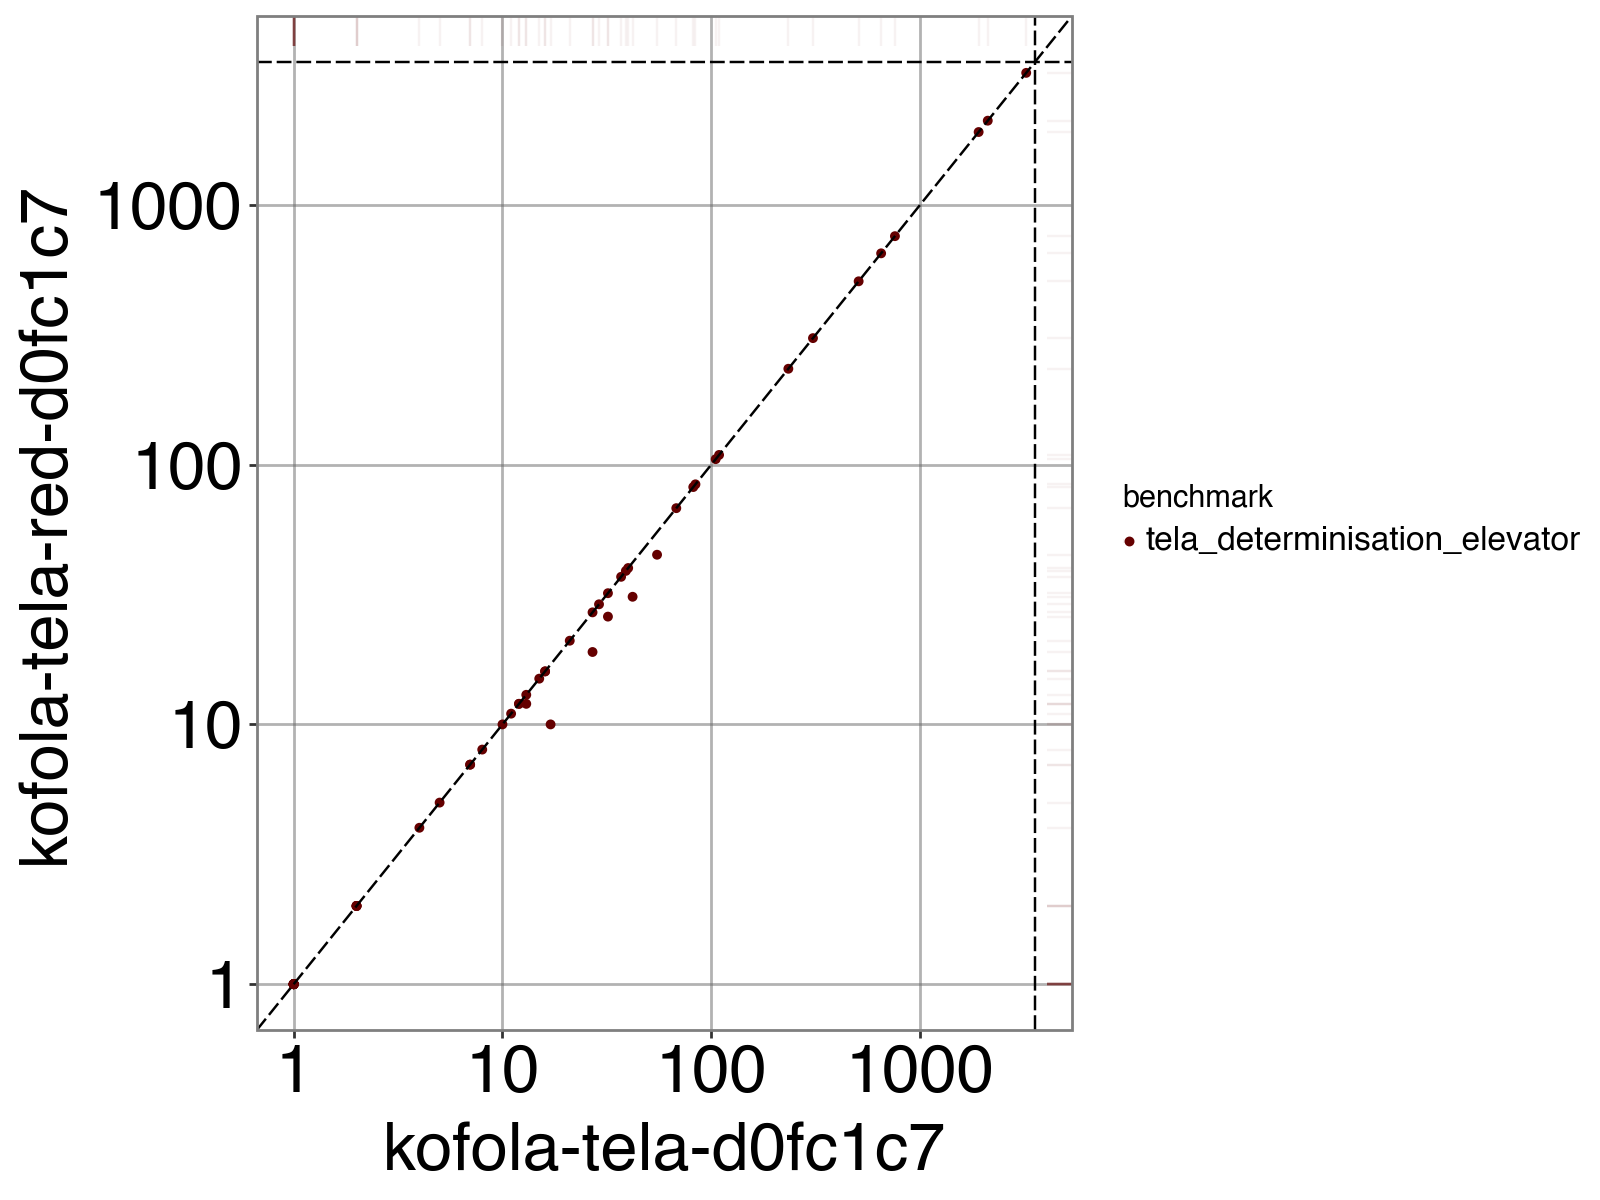

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


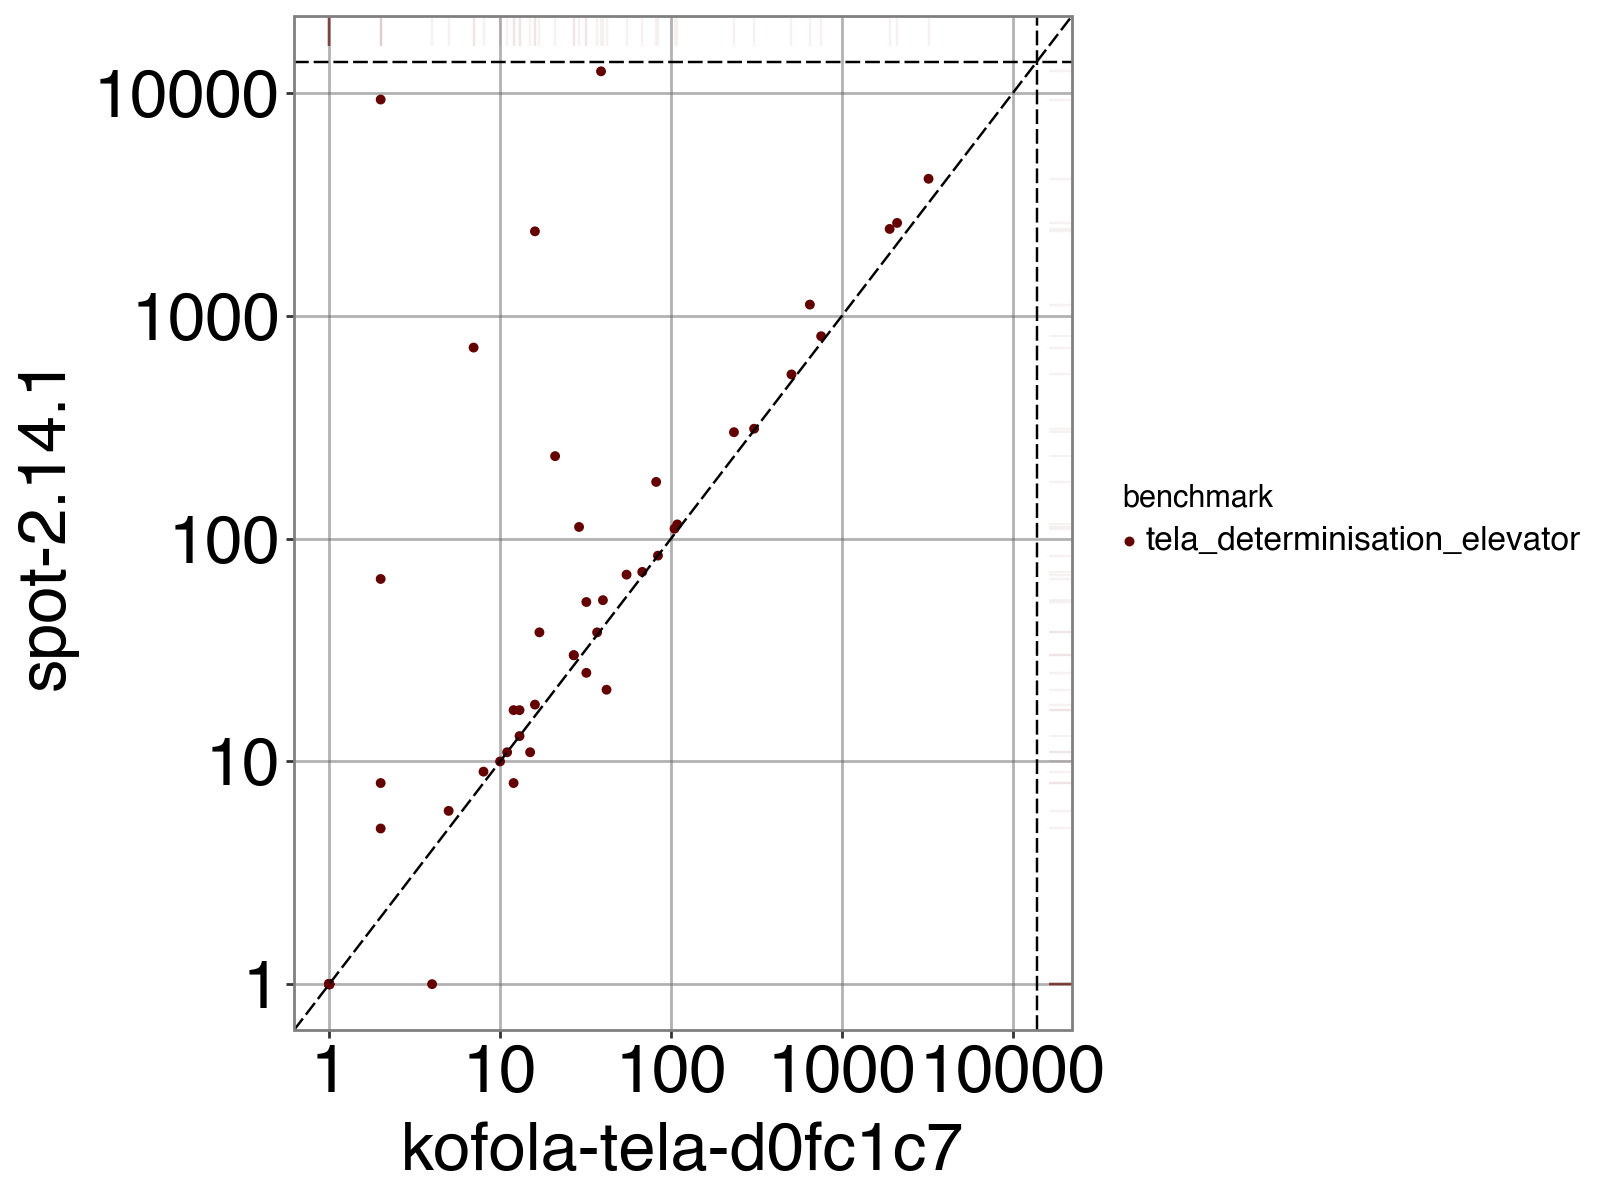

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.


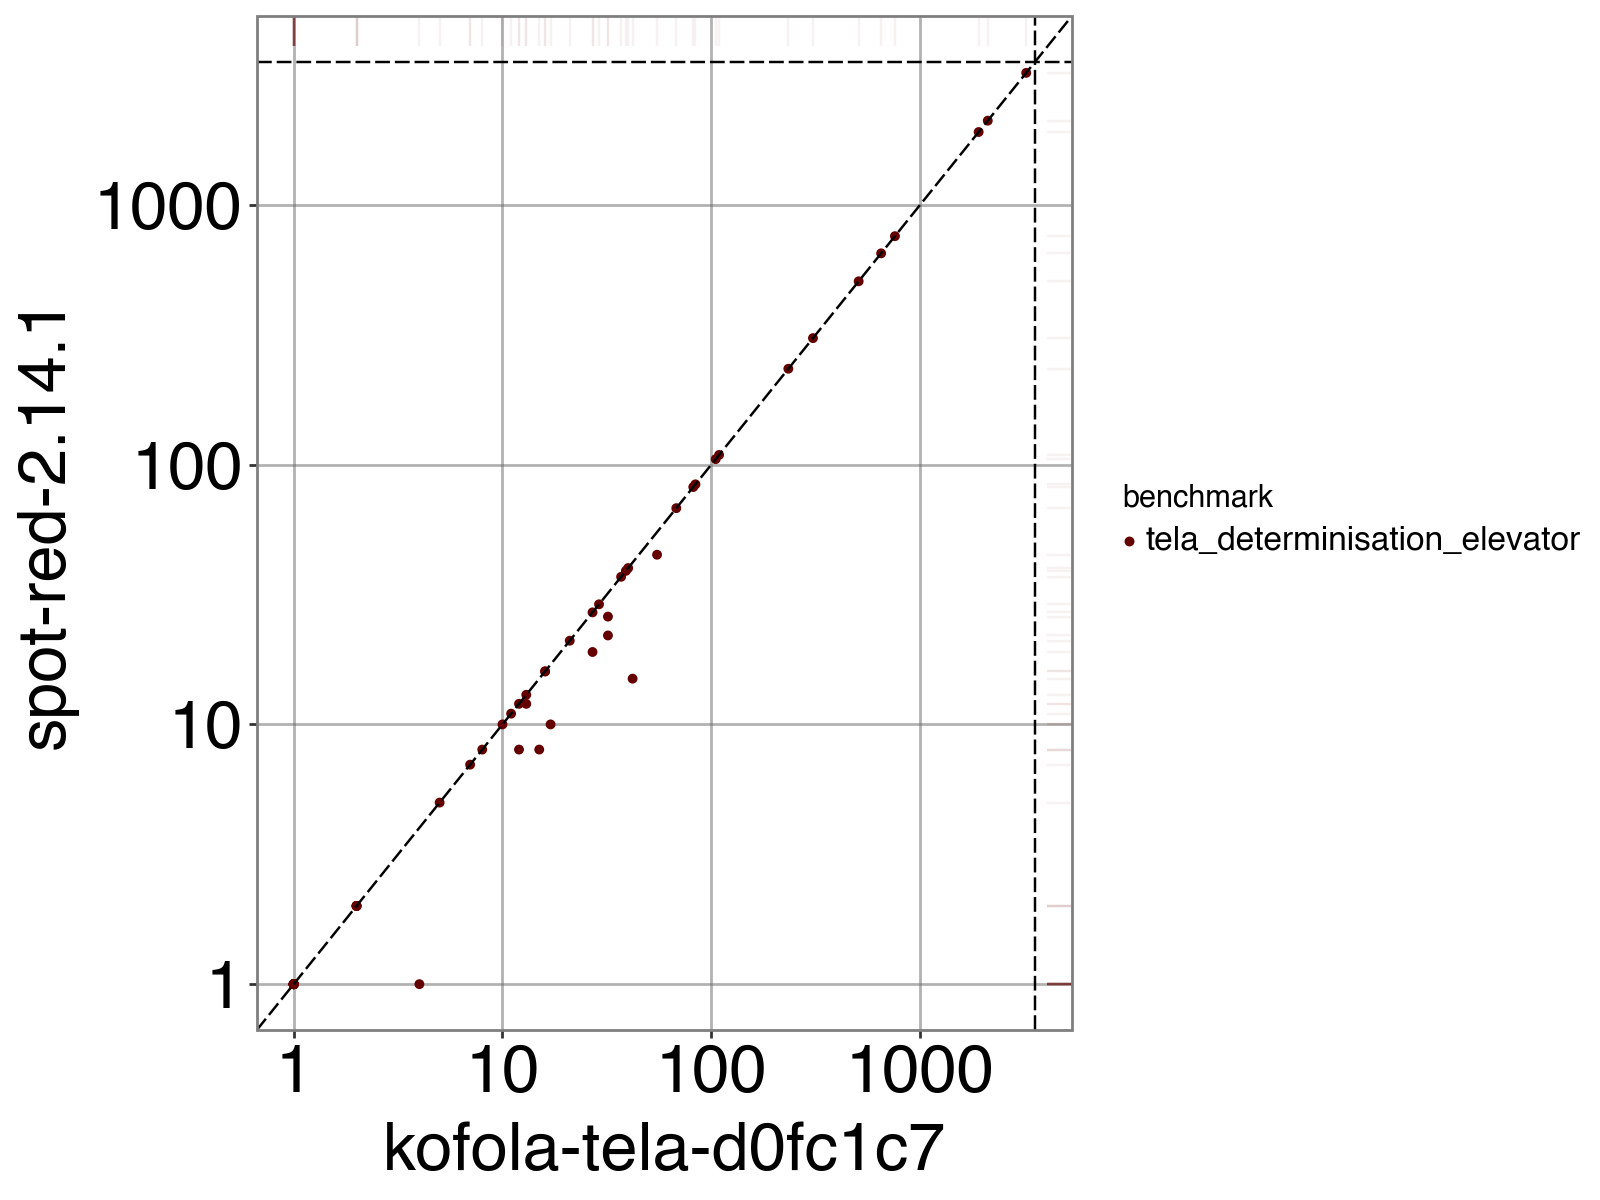

In [9]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot_states(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", clamp=False))

### Time

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


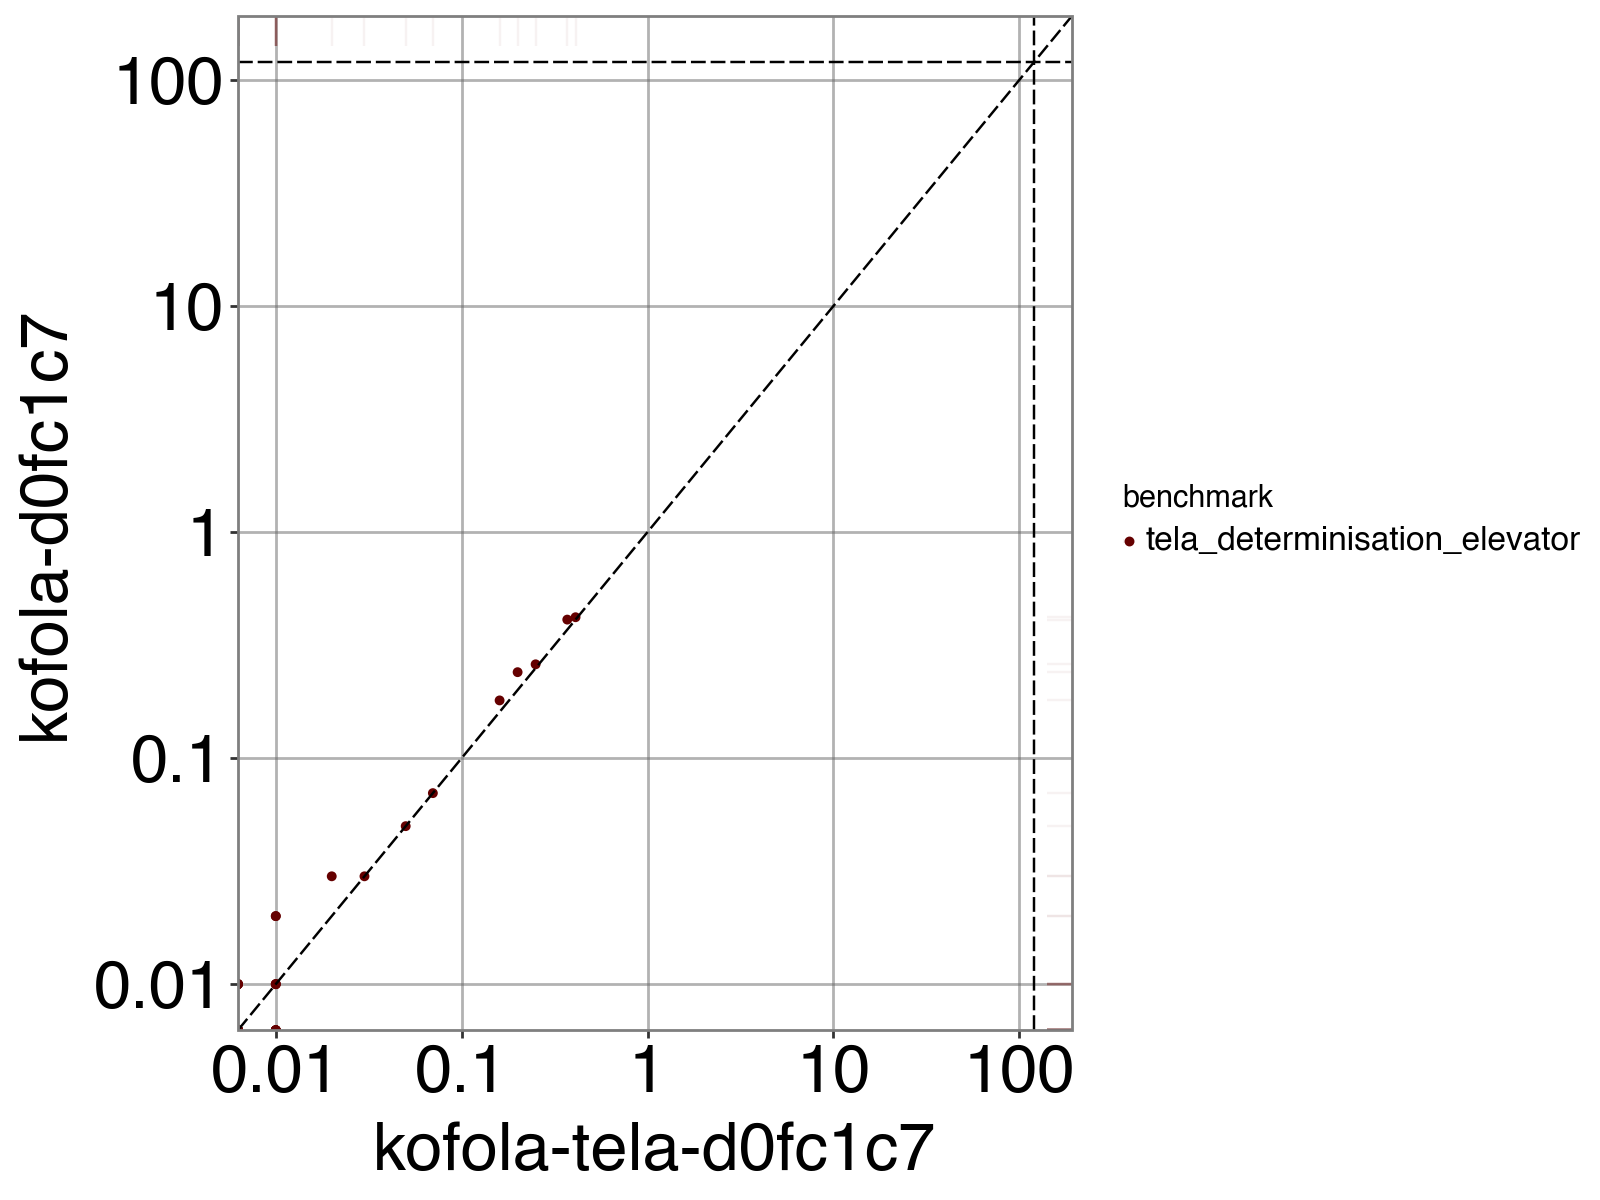

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


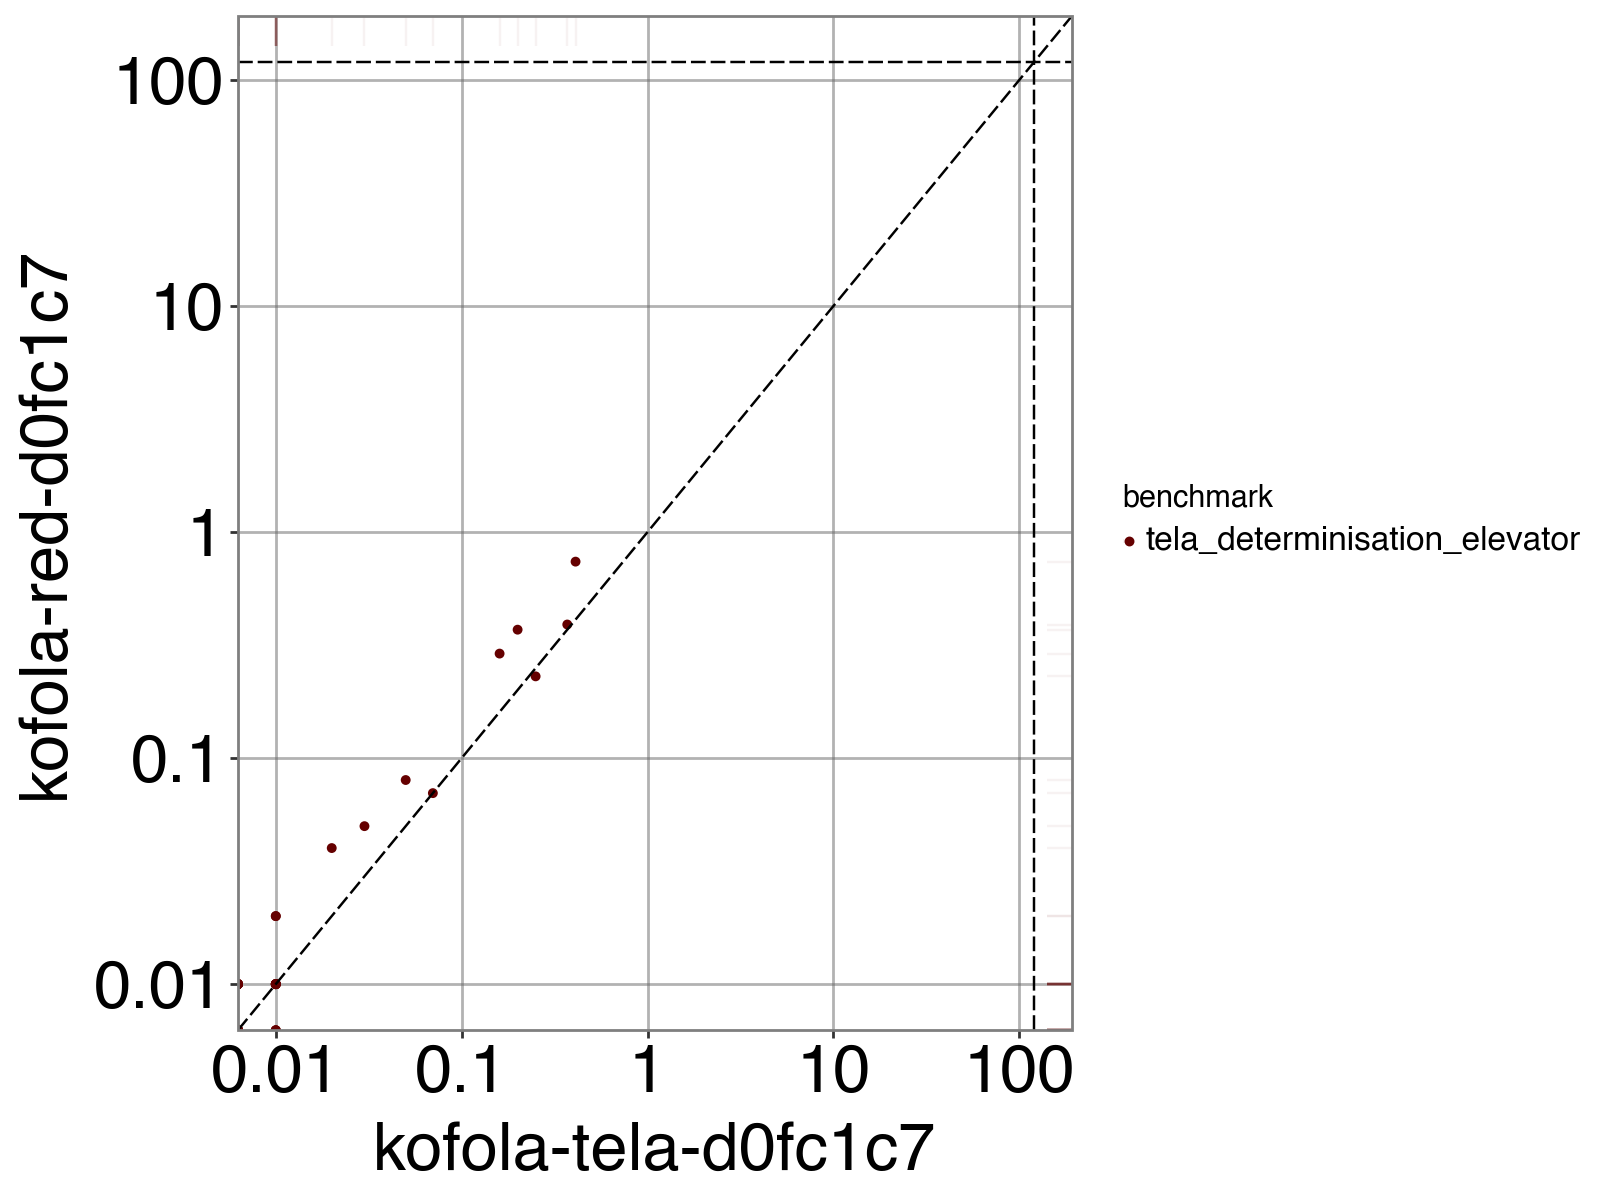

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


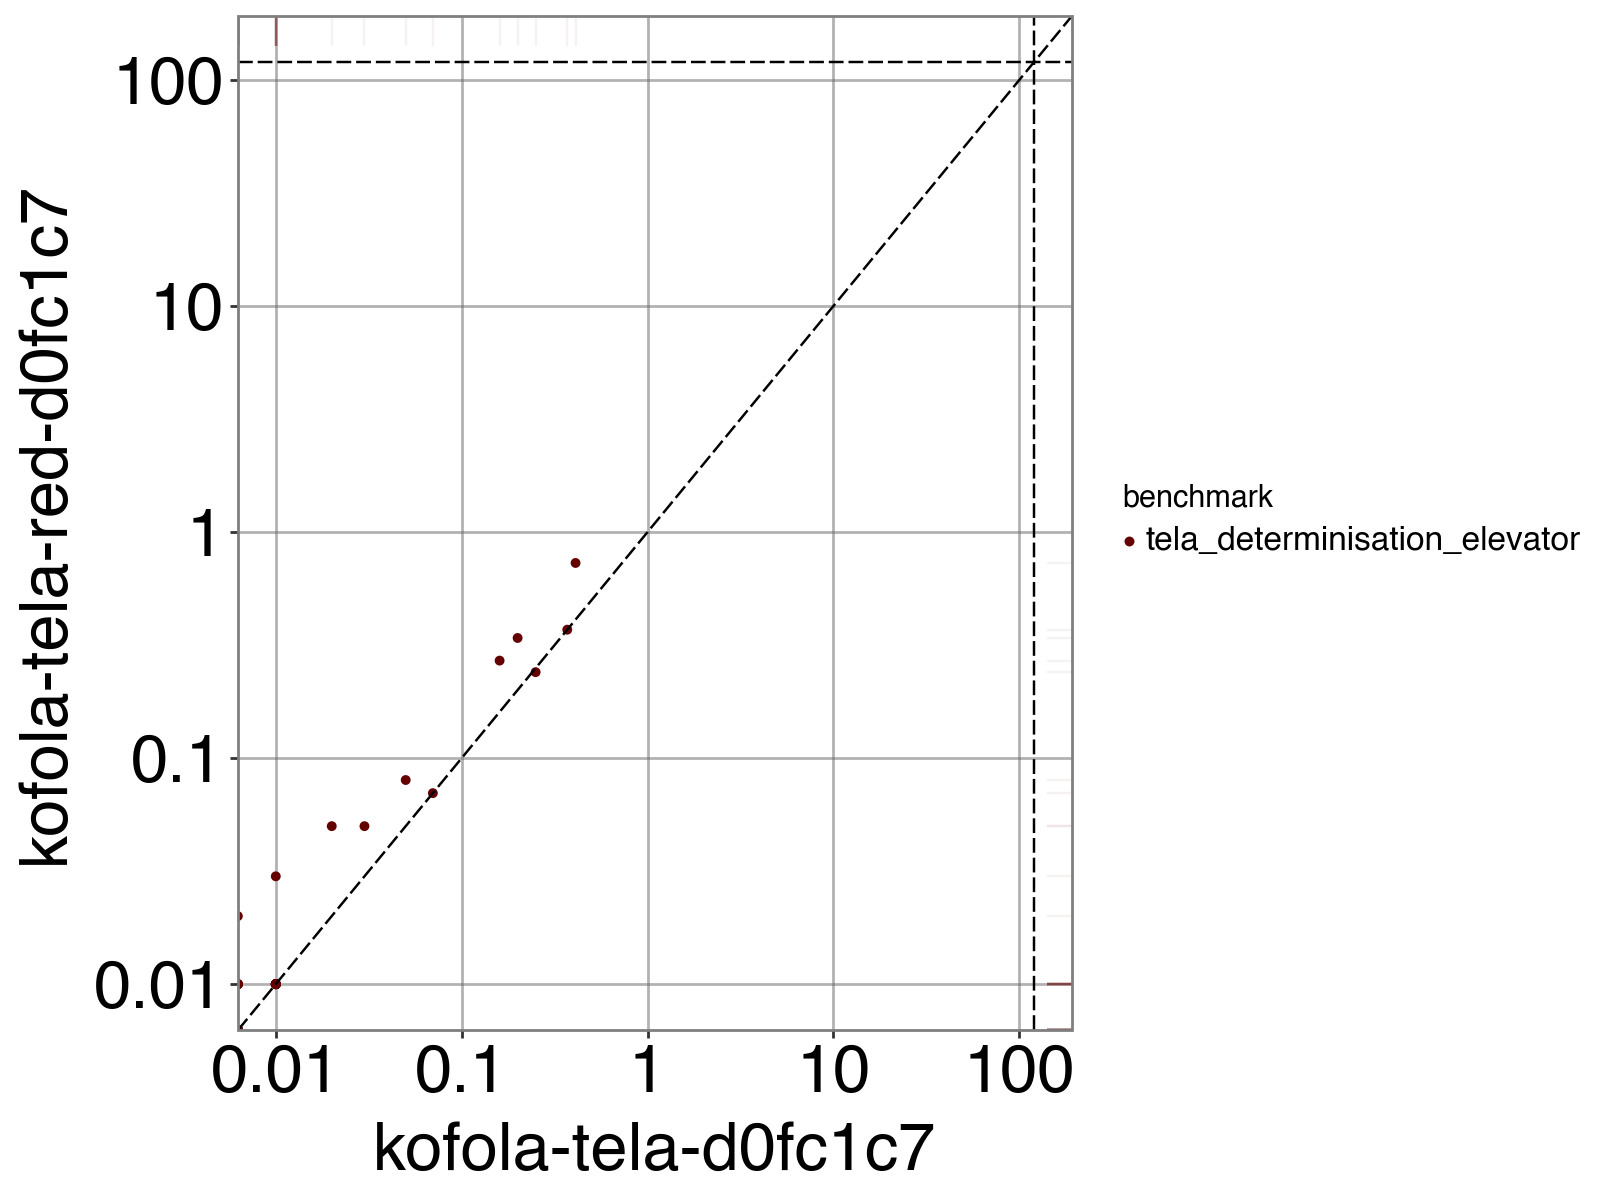

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


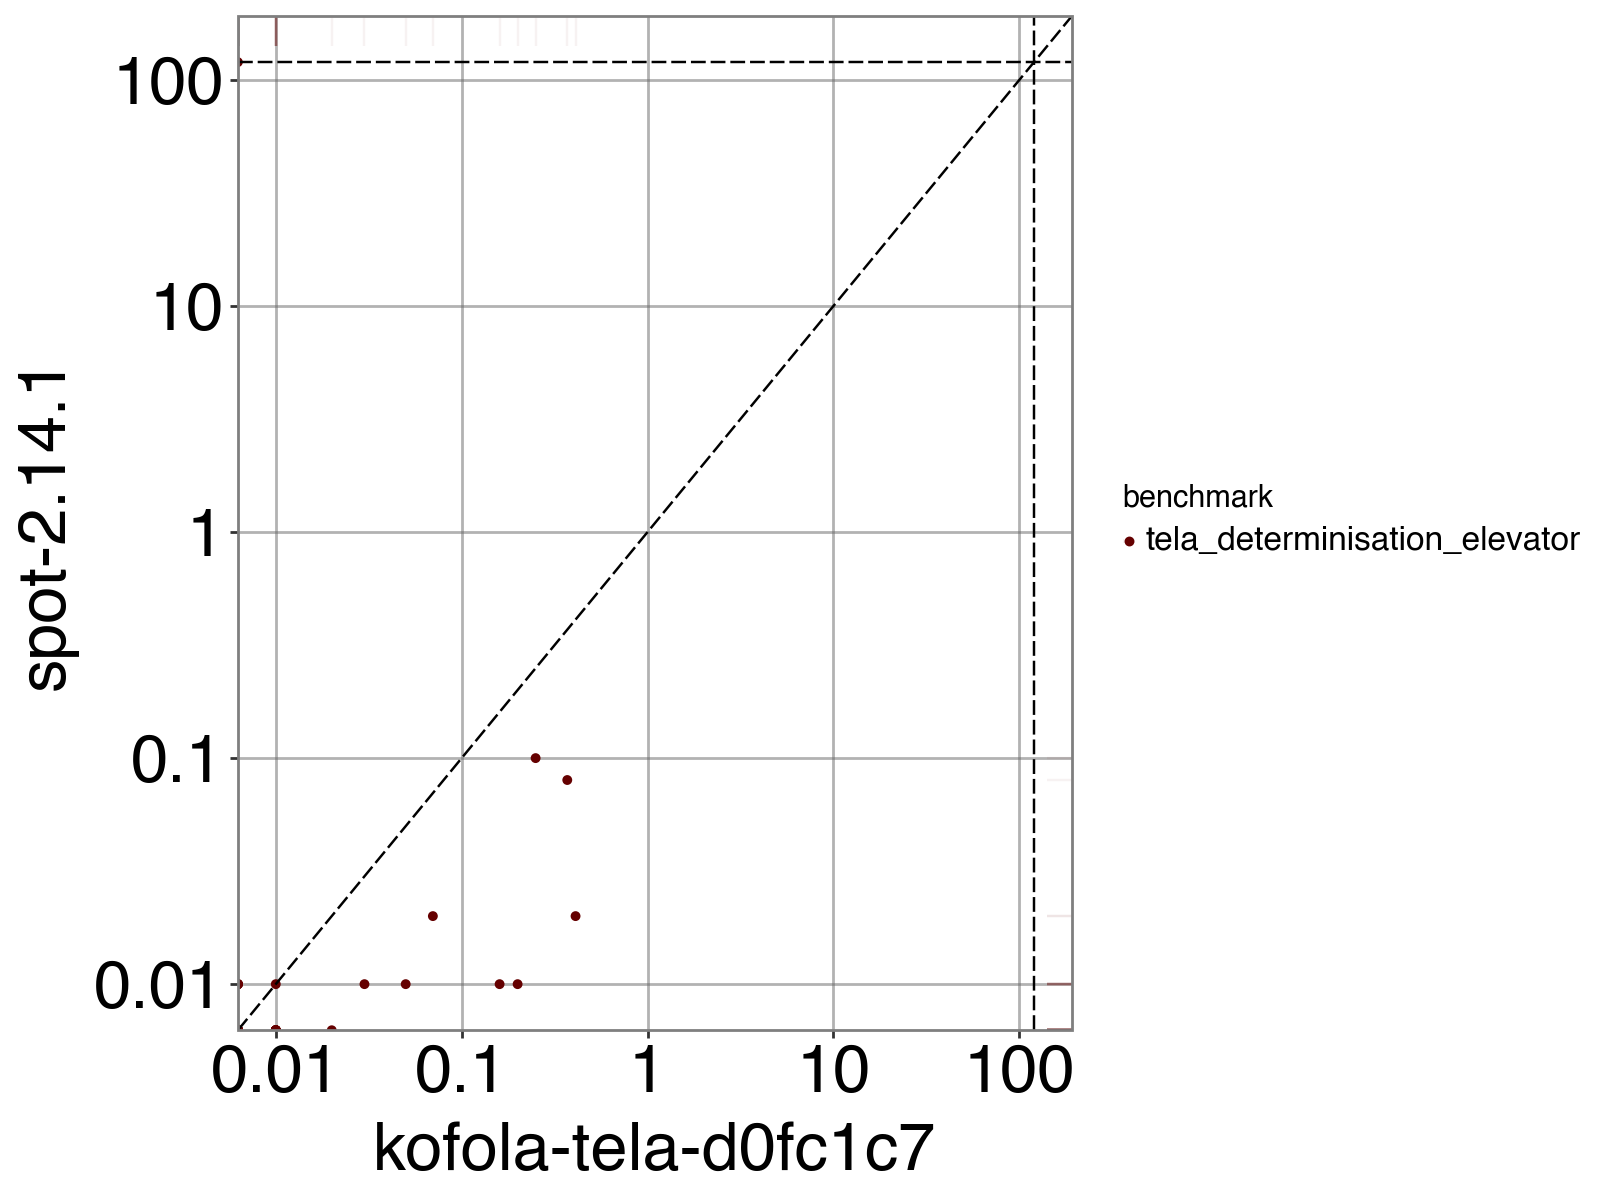

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/plotnine/scales/scale_color.py:92: FutureWarning: You used s=0.9 for the saturation which has been ignored. scale_color_hue now works in HCL colorspace. Using `s` in future versions will throw an exception.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


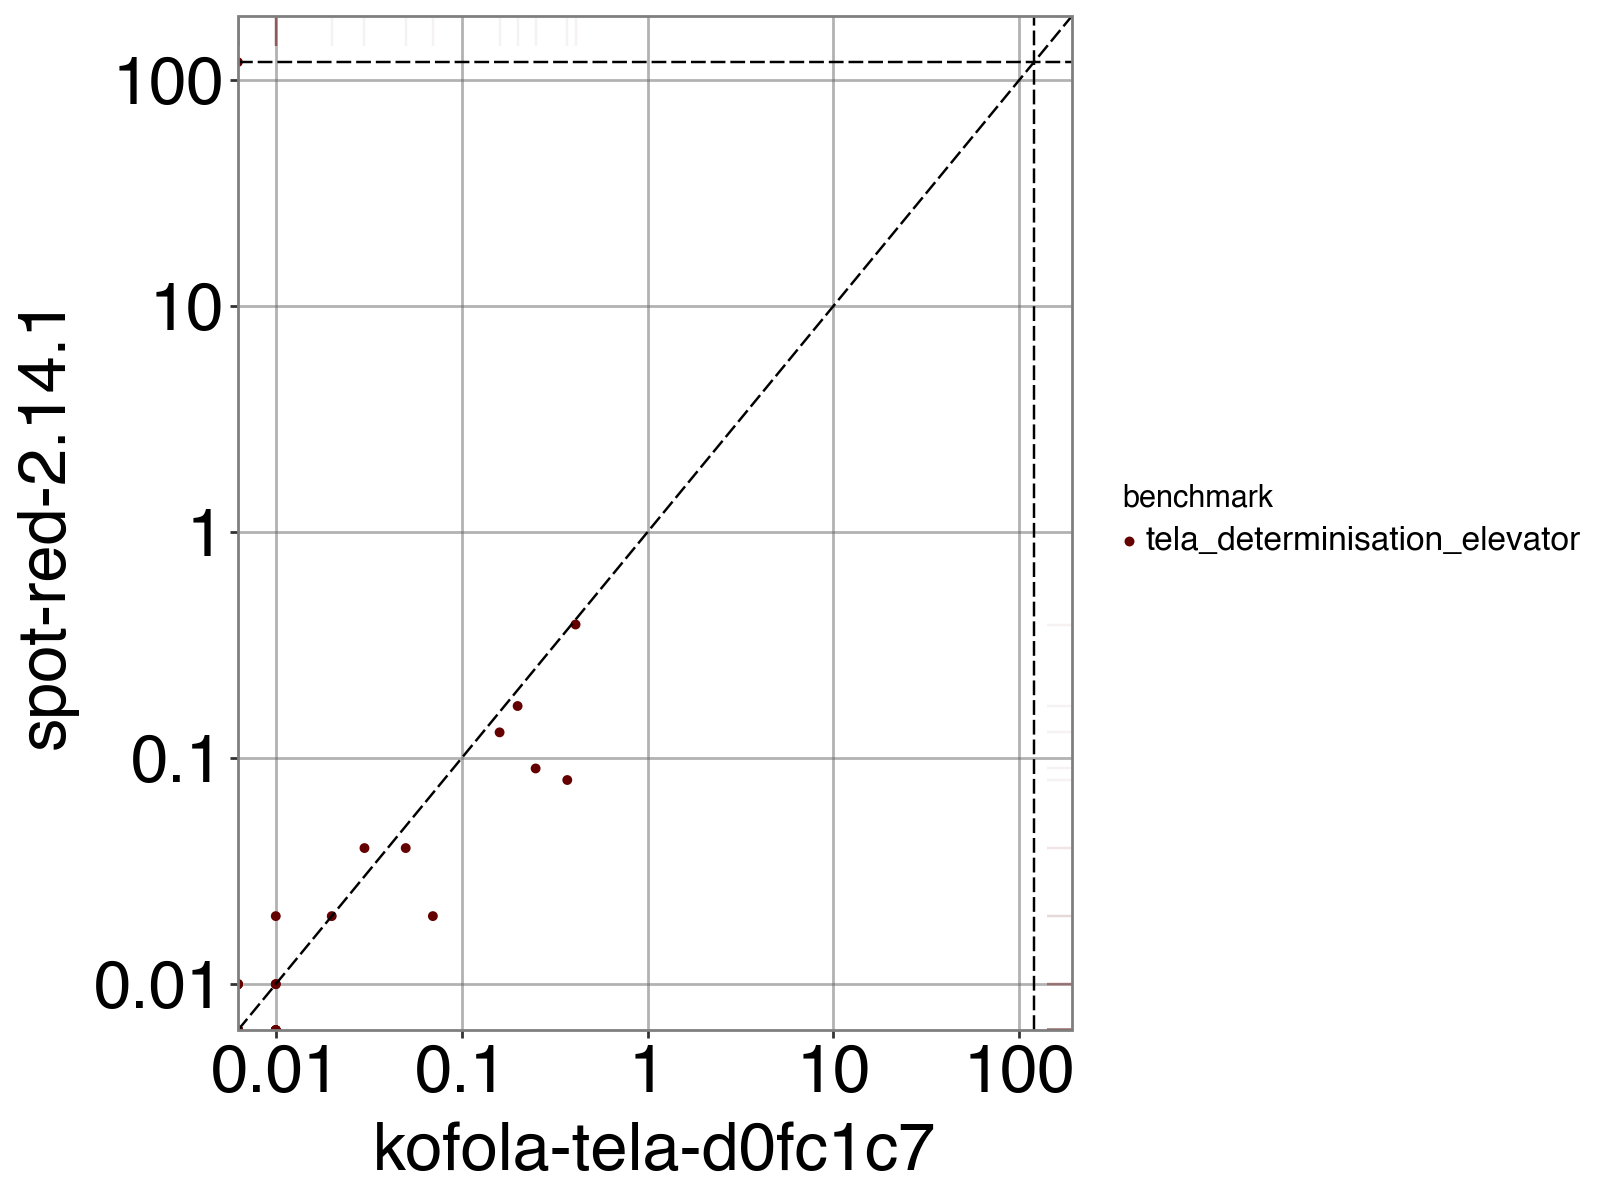

In [10]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", timeout=TIMEOUT))

### More detailed evaluation

In [9]:
get_solved(df_all, TOOL_FOR_COMPARISON)

Loading ITables v2.4.4 from the internet... (need help?)


In [10]:
get_timeouts(df_all, TOOL_FOR_COMPARISON)

Loading ITables v2.4.4 from the internet... (need help?)
